ROC-AUC: 0.8924314322584169
PR-AUC: 0.7465970198370763


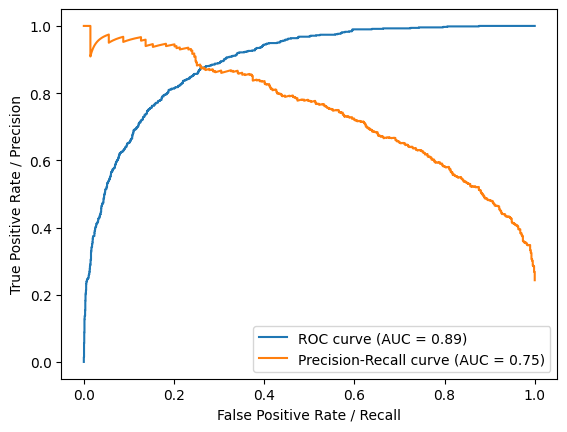

Best parameters: {'C': 0.1, 'kernel': 'linear'}
ROC-AUC score with best parameters: 0.9000682775619449


In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.feature_extraction import DictVectorizer

#Загрузка данных
data = pd.read_csv('salary_part.csv')
data1 = data.drop(data.columns[[-1]], axis=1)
# Разделение признаков на числовые и категориальные
numerical_features = data1.select_dtypes(include=['int'])
categorical_features = data1.select_dtypes(include=['object'])

#Получение целевой переменной (последний столбец)
target = data.iloc[:, -1]
#Ортонормировка числовых признаков
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

#One-hot-кодирование категориальных признаков
vectorizer = DictVectorizer()
categorical_features_encoded = vectorizer.fit_transform(categorical_features.to_dict(orient='records'))

# Объединение числовых и категориальных признаков
X = pd.concat([pd.DataFrame(numerical_features_scaled), pd.DataFrame(categorical_features_encoded.toarray())], axis=1)

#Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.5)

#Обучение классификатора SVM
classifier = SVC(probability=True)
classifier.fit(X_train, y_train)

#Построение ROC и Precision-Recall кривых, вычисление метрик
y_pred_proba = classifier.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)
print('ROC-AUC:',roc_auc)
print('PR-AUC:',pr_auc)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('False Positive Rate / Recall')
plt.ylabel('True Positive Rate / Precision')
plt.legend()
plt.show()

#Подбор лучших параметров с помощью GridSearchCV
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.01,0.1, 1, 10]}
grid_search = GridSearchCV(SVC(probability=True), param_grid, scoring='average_precision')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

#Обучение классификатора с лучшими параметрами и оценка на тестовой выборке
best_classifier = SVC(probability=True, **best_params)
best_classifier.fit(X_train, y_train)
y_pred_proba_best = best_classifier.predict_proba(X_test)[:, 1]
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)
print(f'ROC-AUC score with best parameters: {roc_auc_best}')

